# Processamento de dados PNS

Esse notebook foi desenvolvido para realizar o processamento inicial dos dados contidos no banco PNS 2019, acesasdo pelo IBGE.

O objetivo da minha pesquisa é encontrar o perfil de mulheres que realizaram cirurgia de retirada de utero por motivos de endometriose.

O escopo deste projeto pode ser estendido para abordar violencia contra mulheres na saude ao avaliarmos aspectos socio-economicos.

O banco de dados, assim como o dicionario de dados podem ser acessados em:
https://www.ibge.gov.br/estatisticas/sociais/saude/9160-pesquisa-nacional-de-saude.html?edicao=31438&t=microdados


In [ ]:
import pandas as pd
import numpy as np

from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
pns_dict = pd.read_excel('/content/drive/My Drive/Colab Notebooks/PNS_2019/dicionario_PNS_microdados_2019.xls', skiprows=1)

pns_dict.head(5)

,Posição inicial,Tamanho,Código\nda\nvariável,Quesito,Unnamed: 4,Categorias,Unnamed: 6
0,NaN,NaN,NaN,nº,descrição,Tipo,Descrição
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Parte 1 - Identificação e Controle,NaN,NaN,NaN,NaN,NaN,NaN
3,1,2.0,V0001,NaN,Unidade da Federação,11,Rondônia
4,NaN,NaN,NaN,NaN,NaN,12,Acre


In [ ]:
# retirando as linhas vazias
w = pns_dict.Tamanho.dropna(axis=0).values
ww = w.astype(int)
pns_dict.iloc[:, 2].dropna(axis=0).shape

(1089,)

In [ ]:
pns_data = pd.read_fwf('/content/drive/My Drive/Colab Notebooks/PNS_2019/PNS_2019.txt', header=None, dtype=str, widths=ww)

pns_data.head()

,0,1,2,3,4,5,6,7,8,9,...,1078,1079,1080,1081,1082,1083,1084,1085,1086,1087
0,11,1110011,110000016,0001,01,2019,06,1,1,1,...,1,06,00002098,00000350,2,NaN,NaN,NaN,NaN,20220504
1,11,1110011,110000016,0001,01,2019,06,1,1,0,...,NaN,NaN,00002098,00000350,2,NaN,NaN,NaN,NaN,20220504
2,11,1110011,110000016,0001,01,2019,06,1,1,0,...,1,04,00002098,00000350,2,NaN,NaN,NaN,NaN,20220504
3,11,1110011,110000016,0001,01,2019,06,1,1,9,...,NaN,NaN,00002098,00000350,2,NaN,NaN,NaN,NaN,20220504
4,11,1110011,110000016,0001,01,2019,06,1,1,9,...,NaN,NaN,00002098,00000350,2,NaN,NaN,NaN,NaN,20220504


In [ ]:
tamanho_indices = pns_dict['Tamanho'].dropna().index
var_code = pns_dict.loc[tamanho_indices, 'Código\nda\nvariável']
desc = pns_dict.loc[tamanho_indices, 'Unnamed: 4']

# Combine code and description into a single DataFrame
variable_table = pd.concat([var_code, desc], axis=1)
variable_table.columns = ['Código da variável', 'Descrição']

pd.set_option('display.max_rows', None)
pd.DataFrame(variable_table)

,Código da variável,Descrição
3,V0001,Unidade da Federação
30,V0024,Estrato
31,UPA_PNS,UPA
32,V0006_PNS,Número de ordem do domicílio na PNS
33,V0015,Tipo da entrevista
45,V0020,Ano de referência
46,V0022,Total de moradores
48,V0026,Tipo de situação censitária
50,V0031,Tipo de área
54,V0025A,Seleção do morador de 15 anos ou mais para res...


In [ ]:
# o conjunto de dados possui 293.726 observações e 1088 variáveis
pns_data.shape

(293726, 1088)

In [ ]:
# colocar a descrição das variáveis como nomes das colunas
pns_data.columns = var_code
pns_data.columns

Index(['V0001', 'V0024', 'UPA_PNS', 'V0006_PNS', 'V0015', 'V0020', 'V0022',
       'V0026', 'V0031', 'V0025A',
       ...
       'VDE002', 'VDE014', 'VDF002', 'VDF003', 'VDF004', 'VDL001', 'VDM001',
       'VDP001', 'VDR001', 'VDDATA'],
      dtype='object', name='Código\nda\nvariável', length=1088)

In [ ]:
pns_data.head()

Código da variável,V0001,V0024,UPA_PNS,V0006_PNS,V0015,V0020,V0022,V0026,V0031,V0025A,...,VDE002,VDE014,VDF002,VDF003,VDF004,VDL001,VDM001,VDP001,VDR001,VDDATA
0,11,1110011,110000016,0001,01,2019,06,1,1,1,...,1,06,00002098,00000350,2,NaN,NaN,NaN,NaN,20220504
1,11,1110011,110000016,0001,01,2019,06,1,1,0,...,NaN,NaN,00002098,00000350,2,NaN,NaN,NaN,NaN,20220504
2,11,1110011,110000016,0001,01,2019,06,1,1,0,...,1,04,00002098,00000350,2,NaN,NaN,NaN,NaN,20220504
3,11,1110011,110000016,0001,01,2019,06,1,1,9,...,NaN,NaN,00002098,00000350,2,NaN,NaN,NaN,NaN,20220504
4,11,1110011,110000016,0001,01,2019,06,1,1,9,...,NaN,NaN,00002098,00000350,2,NaN,NaN,NaN,NaN,20220504


In [ ]:
pd.set_option('display.max_rows', None)
pd.DataFrame(pns_data.columns)

,Unnamed: 4
0,Unidade da Federação
1,Estrato
2,UPA
3,Número de ordem do domicílio na PNS
4,Tipo da entrevista
5,Ano de referência
6,Total de moradores
7,Tipo de situação censitária
8,Tipo de área
9,Seleção do morador de 15 anos ou mais para res...


In [ ]:
# Salva 4051 registros aleatorios de mulheres(C001 = '2') que nao realizaram retirada de utero(R011 = np.nan)
women_without_hysterectomy = pns_data[(pns_data['R011'].isna())]

num_records_to_sample = 4051
if len(women_without_hysterectomy) >= num_records_to_sample:
    healthy_women_ds = women_without_hysterectomy.sample(n=num_records_to_sample, random_state=42) # Using a random_state for reproducibility
    print(f"Successfully sampled {num_records_to_sample} records.")
else:
    healthy_women_ds = women_without_hysterectomy
    print(f"Only {len(healthy_women_ds)} records found matching the criteria. All available records were selected.")

print(f"Shape of healthy_women_ds: {healthy_women_ds.shape}")
healthy_women_ds.to_csv('/content/drive/My Drive/Colab Notebooks/PNS_2019/pns_2019_women_noHysterectomy.csv', index=False)

Successfully sampled 4051 records.
Shape of healthy_women_ds: (4051, 1088)


In [ ]:
pns_data = pd.read_fwf('/content/drive/My Drive/Colab Notebooks/PNS_2019/pns_2019_women_noHysterectomy.csv', sep='	', widths=ww)

pns_data.head()

,V0,"001,V00","24,UPA_PN","S,V0",00,6_PN,"S,",V,0,0.1,...,0.267,"2,.2","J01101,J","012,J013",0.268,"1,.7",J,0.269,1.99,"4,J01502"
0,25,",255102","0,2500057","64,0",1,"4,01",",2",0,1,9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,27,",271011","1,2700191","47,0",0,"8,01",",2",0,1,9,...,2,45,.5373886,"8,01218.",9,41,1,5,8,"35,,0010"
2,33,",332201","2,3300213","83,0",1,"2,01",",2",0,1,9,...,",",",,",",,,,,,,,",",,,,,,,,",",",",,",0,1,0,04.13431
3,35,",352201","2,3501286","50,0",0,"2,01",",2",0,1,9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,13,",131011","3,1300263","20,0",1,"0,01",",2",0,1,9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Seleção das variaveis de estudo

Nesta seção selecionamos as variaveis de interesse, elas foram escolhidas com base no dominio do problema idealizado pelo autor, representado abaixo.

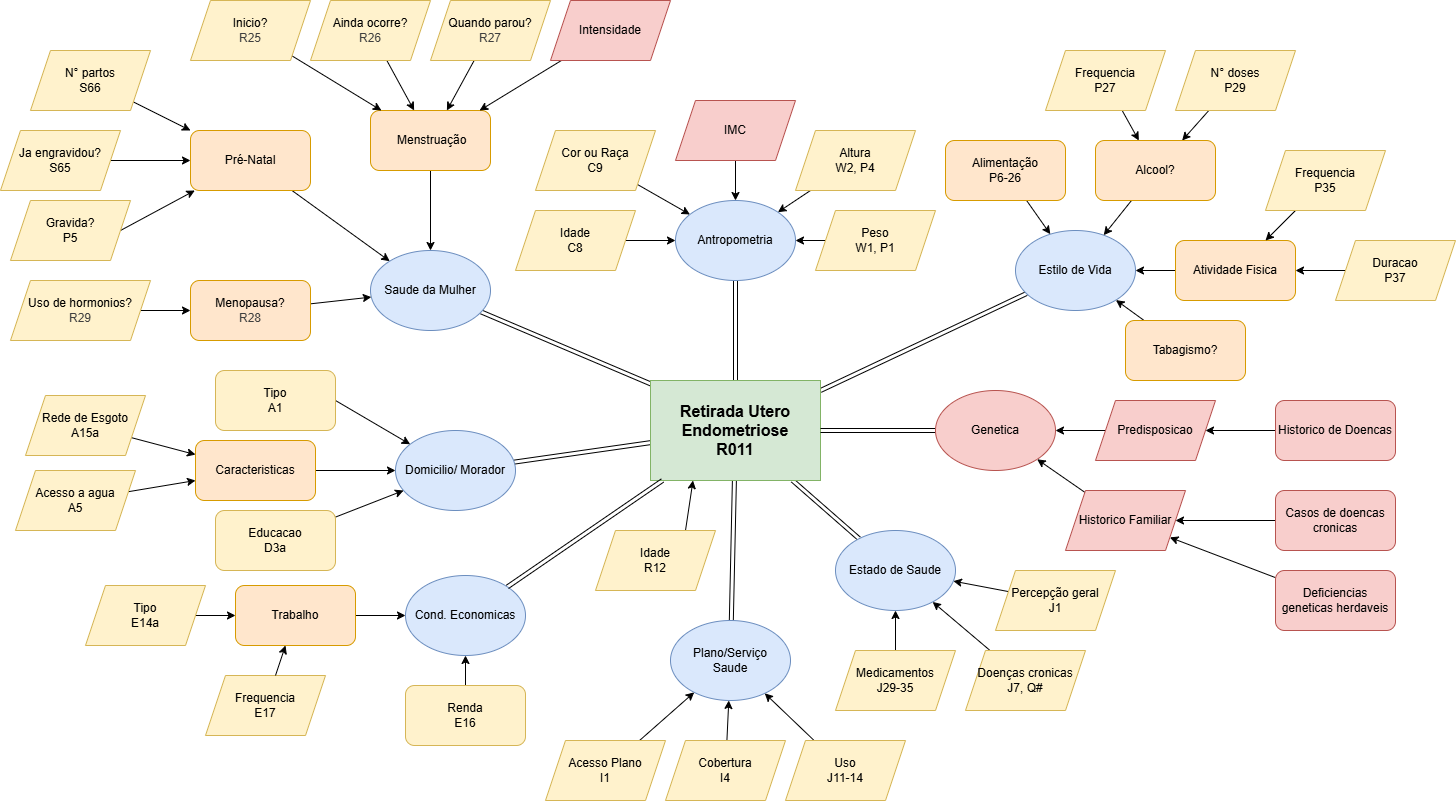

In [ ]:
# Indices das variaveis de interesse
pns_data = pns_data.iloc[:, [0,
                             1,
                             2,
                             3,
                             11,
                             65,
                             66,
                             87,
                             109,
                             115,
                             119,
                             214,
                             221,
                             228,
                             240,
                             241,
                             242,
                             243,
                             437,
                             441,
                             444,
                             467,
                             468,
                             470,
                             471,
                             472,
                             473,
                             475,
                             476,
                             478,
                             480,
                             482,
                             485,
                             495,
                             827,
                             828,
                             839,
                             841,
                             842,
                             843,
                             863,
                             864]]

In [ ]:
# nomes originais das variáveis de interesse
pns_data.columns.values

array(['V0001', 'V0024', 'UPA_PNS', 'V0006_PNS', 'A001', 'C008', 'C009',
       'D00901', 'E01401', 'E01601', 'E017', 'I00101', 'I004', 'J001',
       'J01101', 'J012', 'J01301', 'J014', 'P00103', 'P00403', 'P005',
       'P006', 'P00901', 'P01101', 'P013', 'P015', 'P02001', 'P01601',
       'P018', 'P02002', 'P023', 'P02501', 'P027', 'P035', 'R011', 'R012',
       'R025', 'R027', 'R028', 'R029', 'S065', 'S066'], dtype=object)

In [ ]:
# novos nomes
pns_data.columns = ['uf',
                    'estrato',
                    'UPA',
                    'num_ordem_domicilio',
                    'tipo_domicilio',
                    'idade_entrevista',
                    'cor_raca',
                    'nivel_educacao',
                    'ocupacao_trabalho',
                    'renda_trabalho',
                    'horas_trabalho_semanais',
                    'plano__odontologico',
                    'tipo_plano_saude',
                    'percepcao_estado_saude',
                    'data_ultima_consulta_medica',
                    'num_constultas__medicas_12m',
                    'data_ultima_consulta_odonto',
                    'assistencia_medica_2semanas',
                    'peso',
                    'altura',
                    'atualmente_gravida',
                    'consumo_semanal_feijao',
                    'consumo_semanal_legumes_verduras',
                    'consumo_semanal_carne_vermelha',
                    'consumo_semanal_carne_branca',
                    'consumo_semanal_carne_peixe',
                    'consumo_semanal_refrescos',
                    'consumo_semanal_suco_frutas',
                    'consumo_semanal_frutas',
                    'consumo_semanal_refrigerante',
                    'consumo_semanal_leite',
                    'consumo_semanal_doces',
                    'frequencia_consumo_alcool',
                    'pratica_semanal_atv_fisica',
                    'motivo_retirada_utero',
                    'idade_retirada_utero',
                    'idade_primeira_menstruacao',
                    'idade_parada_menstruacao',
                    'esta_menopausa',
                    'tratamento_hormonal_menopausa',
                    'quant_gravidez',
                    'quant_partos']

In [ ]:
#Salva versao reduzida do dataset com as 40 variaveis selecionadas, para nao precisar abrir o dataset inteiro nas proximas vezes
pns_data.to_csv('/content/drive/My Drive/Colab Notebooks/PNS_2019/pns_2019_42variaveis_mulheres_saudaveis.xls', sep='	', encoding='utf-8')

In [ ]:
pns_data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/PNS_2019/pns_2019_42variaveis.xls', sep='	', header=None, index_col=False, dtype=str)

# Drop the first column(index column)
pns_data = pns_data.iloc[:, 1:]

# Set the first row as the new header
pns_data.columns = pns_data.iloc[0]

# Drop the first row from the data, as it is now the header
pns_data = pns_data[1:].reset_index(drop=True)
pns_data.head()

,uf,estrato,UPA,num_ordem_domicilio,tipo_domicilio,idade_entrevista,cor_raca,nivel_educacao,ocupacao_trabalho,renda_trabalho,...,frequencia_consumo_alcool,pratica_semanal_atv_fisica,motivo_retirada_utero,idade_retirada_utero,idade_primeira_menstruacao,idade_parada_menstruacao,esta_menopausa,tratamento_hormonal_menopausa,quant_gravidez,quant_partos
0,11,1110011,110000016,0001,1,055,1,05,6,1,...,2,1,NaN,NaN,12,45,1,2,1,04
1,11,1110011,110000016,0001,1,069,4,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,11,1110011,110000016,0001,1,031,2,10,3,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,11,1110011,110000016,0001,1,009,2,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,11,1110011,110000016,0001,1,006,4,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# converter todas as colunas para número
pns_data = pns_data.apply(pd.to_numeric, errors='coerce')

In [ ]:
# selecao de linhas que responderam a variavel 827 - motivo retirada de utero
# contagem do tipo de respostas, variam de 1 a 7

pns_data = pns_data[pns_data['motivo_retirada_utero'].isin(range(1, 7))]

print("Mioma uterino:" + str(pns_data[pns_data['motivo_retirada_utero'] == 1].shape[0]))
print("Prolapso do útero:" + str(pns_data[pns_data['motivo_retirada_utero'] == 2].shape[0]))
print("Endometriose:" + str(pns_data[pns_data['motivo_retirada_utero'] == 3].shape[0]))
print("Câncer ginecológico:" + str(pns_data[pns_data['motivo_retirada_utero'] == 4].shape[0]))
print("Complicações da gravidez ou parto:" + str(pns_data[pns_data['motivo_retirada_utero'] == 5].shape[0]))
print("Sangramento vaginal anormal:" + str(pns_data[pns_data['motivo_retirada_utero'] == 6].shape[0]))
print("Outro:" + str(pns_data[pns_data['motivo_retirada_utero'] == 7].shape[0]))

Mioma uterino:38
Prolapso do útero:108
Endometriose:3
Câncer ginecológico:5
Complicações da gravidez ou parto:4
Sangramento vaginal anormal:2
Outro:0


In [ ]:
pns_data.shape

(4051, 42)

## Categorização e Dicotomização das variaveis

Nesta secao realizamos a binarizacao das variaveis, etapa necessaria para aplicacao das regras de asssociacao.
Os valores originais das variaveis passam a ser descritos como 0 ou 1, em casos mais complexos como idade, foi decidido aplicar o One Hot Vector, onde as possiveis respostas se tornam colunas e somente uma delas é marcada, mantendo o teor inicial dos dados.

### UF, estrato e UPA(TODAS RETIRADAS)

UF foram divididos categoricamente para permitir avaliacao mais detalhada por estado

Estrato e UPA sao categoricos e nao foram mudados, podem ser retirados???

In [ ]:
# criar nova coluna com as siglas dos estados
#estado = {11: 'RO', 12: 'AC', 13: 'AM', 14: 'RR', 15: 'PA', 16: 'AP', 17: 'TO',
#          21: 'MA', 22: 'PI', 23: 'CE', 24: 'RN', 25: 'PB',
#          26: 'PE', 27: 'AL', 28: 'SE', 29: 'BA',
#          31: 'MG', 32: 'ES', 33: 'RJ', 35: 'SP',
#          41: 'PR', 42: 'SC', 43: 'RS',
#          50: 'MS', 51: 'MT', 52: 'GO', 53: 'DF'}
#pns_data['nome_uf'] = pns_data['uf'].map(estado)

In [ ]:
pns_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 160 entries, 38 to 4028
Data columns (total 42 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   uf                                160 non-null    int64  
 1   estrato                           0 non-null      float64
 2   UPA                               0 non-null      float64
 3   num_ordem_domicilio               0 non-null      float64
 4   tipo_domicilio                    160 non-null    float64
 5   idade_entrevista                  0 non-null      float64
 6   cor_raca                          61 non-null     float64
 7   nivel_educacao                    50 non-null     float64
 8   ocupacao_trabalho                 78 non-null     float64
 9   renda_trabalho                    62 non-null     float64
 10  horas_trabalho_semanais           0 non-null      float64
 11  plano__odontologico               44 non-null     float64
 12  tipo_plano_

### Domicilio e Morador

Ordem de Domicilio (RETIRADO)
* Categorico - nao foi modificado

Tipo de domicilio
*   0 - Casa
*   1 - Apartamento

Nivel de educacao
* 0 - Fundamental
* 1 - Medio
* 2 - Superior

In [ ]:
def binarizar_tipo_domicilio(x):
    if x in [1,3]:
        return 0
    elif x == 2:
        return 1
    else:
        return np.nan

def binarizar_nivel_educacao(x):
    if x in [1, 2, 3, 4, 5, 6, 7, 8]:
        return 0
    elif x in [9, 10, 11]:
        return 1
    elif x in [12, 13, 14, 15]:
        return 2
    else:
        return np.nan

pns_data['tipo_domicilio'] = pns_data['tipo_domicilio'].apply(binarizar_tipo_domicilio)
pns_data['nivel_educacao'] = pns_data['nivel_educacao'].apply(binarizar_nivel_educacao)

### Antropometria

Idade
* 0 - 0-20 anos
* 1 - 21-40 anos
* 2 - 41-60 anos
* 3 - 61-80 anos
* 4 - 81+ anos

Cor-Raca
* 0 - Branco
* 1 - Preto
* 2 - Pardo

Altura(cm)
* 0 - Menos de 1,55
* 1 - Entre 1,65 e 1,79
* 2 - 1,80 acima

Peso(kg)
* 0 - Ate 60 kg
* 1 - Entre 61 e 80
* 2 - 81 acima


In [ ]:
def binarizar_idade(x):
  if x < 20:
    return 0
  elif x < 40:
    return 1
  elif x < 60:
    return 2
  elif x < 80:
    return 3
  else:
    return 4

def binarizar_cor_raca(x):
  if x in [1, 3]:
    return 0
  elif x == 2:
    return 1
  elif x in [4, 5]:
    return 2

def binarizar_altura(x):
  if x < 155:
    return 1
  elif x < 180:
    return 2
  else:
    return 3

def binarizar_peso(x):
  if x < 60:
    return 0
  elif x < 80:
    return 1
  else:
    return 2

pns_data['idade_entrevista'] = pns_data['idade_entrevista'].apply(binarizar_idade)
pns_data['cor_raca'] = pns_data['cor_raca'].apply(binarizar_cor_raca)
pns_data['altura'] = pns_data['altura'].apply(binarizar_altura)
pns_data['peso'] = pns_data['peso'].apply(binarizar_peso)

### Condicao Economica

Ocupacao
* 0 - Empregado (Publico/Privado)
* 1 - Informal
* 2 - Empregador
* 3 - Outros

Renda (SM 2019 = 998)
* 0 - Ate 2 salarios minimos
* 1 - Ate 5 salarios minimos
* 2 - Ate 8 salarios minimos
* 3 - Acima de 10 salarios minimos

Horas dedicacao semanal
* 0 - Ate 40 horas
* 1 - Acima de 40 horas

In [ ]:
def binarizar_ocupacao(x):
  if x in [2, 3, 4]:
    return 0
  elif x in [1, 6, 7]:
    return 1
  elif x == 5:
    return 2
  else:
    return 3

def binarizar_renda(x):
  if x < 998*2:
    return 0
  elif x < 998*5:
    return 1
  elif x < 998*8:
    return 2
  else:
    return 3

def binarizar_horasDedicacao(x):
  if x <= 40:
    return 0
  elif x > 40:
    return 1

pns_data['ocupacao_trabalho'] = pns_data['ocupacao_trabalho'].apply(binarizar_ocupacao)
pns_data['renda_trabalho'] = pns_data['renda_trabalho'].apply(binarizar_renda)
pns_data['horas_trabalho_semanais'] = pns_data['horas_trabalho_semanais'].apply(binarizar_horasDedicacao)

### Saude geral, planos

plano__odontologico
* 0 - Sim
* 1 - Nao

tipo_plano_saude(rever)
* 0 - Privado
* 1 - Corporativo

percepcao_estado_saude
* 0 - Bom
* 1 - Rergular
* 2 - Ruim

data_ultima_consulta_medica(retirar???)
* 0 - Ate 3 meses
* 1 - Entre 3 e 12 meses
* 2 - Mais que 12 meses

num_constultas__medicas_12m
* 0 - Ate 4 consultas
* 1 -  5 ou mais

data_ultima_consulta_odonto(retirar???)
* 0 - Ate 3 meses
* 1 - Entre 3 e 12 meses
* 2 - Mais que 12 meses

assistencia_medica_2semanas
* 0 - Sim
* 1 - Nao



In [ ]:
def binarizar_plano_odonto(x):
  if x == 1:
    return 0
  elif x == 2:
    return 1
  else:
    return np.nan

def binarizar_tipo_plano(x):
  if x == 1:
    return 0
  elif x == 2:
    return 1
  else:
    return np.nan

def binarizar_percepcao_saude(x):
  if x in [1, 2]:
    return 0
  elif x == 3:
    return 1
  elif x in [4, 5]:
    return 2
  else:
    return np.nan

def binarizar_num_consultas_12m(x):
  if x < 4:
    return 0
  else:
    return 1

def binarizar_assistencia_2sem(x):
  if x == 1:
    return 0
  elif x == 2:
    return 1
  else:
    return np.nan

pns_data['plano__odontologico'] = pns_data['plano__odontologico'].apply(binarizar_plano_odonto)
pns_data['tipo_plano_saude'] = pns_data['tipo_plano_saude'].apply(binarizar_tipo_plano)
pns_data['percepcao_estado_saude'] = pns_data['percepcao_estado_saude'].apply(binarizar_percepcao_saude)
pns_data['num_constultas__medicas_12m'] = pns_data['num_constultas__medicas_12m'].apply(binarizar_num_consultas_12m)
pns_data['assistencia_medica_2semanas'] = pns_data['assistencia_medica_2semanas'].apply(binarizar_assistencia_2sem)

### Estilo de Vida

freq_alcool (UNIAO FREQ e QUANT)

quant_alcol


In [ ]:
def binarizar_alcool(x):
  if x == 1:
    return 0
  elif x == 2:
    return 1
  elif x == 3:
    return 2
  else:
    return np.nan

def binarizar_atividade_fisica(x):
  if x <= 2:
    return 0
  elif x <= 5:
    return 1
  elif x <= 7:
    return 2
  else:
    return np.nan

def binarizar_consumo_feijao(x):
  if x <= 2:
    return 0
  elif x <= 5:
    return 1
  elif x <= 7:
    return 2
  else:
    return np.nan

def binarizar_consumo_verdura_legume(x):
  if x <= 2:
    return 0
  elif x <= 5:
    return 1
  elif x <= 7:
    return 2
  else:
    return np.nan

def binarizar_consumo_carneVermelha(x):
  if x <= 2:
    return 0
  elif x <= 5:
    return 1
  elif x <= 7:
    return 2
  else:
    return np.nan

def binarizar_consumo_carneBranca(x):
  if x <= 2:
    return 0
  elif x <= 5:
    return 1
  elif x <= 7:
    return 2
  else:
    return np.nan

def binarizar_consumo_carnePeixe(x):
  if x <= 2:
    return 0
  elif x <= 5:
    return 1
  elif x <= 7:
    return 2
  else:
    return np.nan

def binarizar_consumo_refrescos(x):
  if x <= 2:
    return 0
  elif x <= 5:
    return 1
  elif x <= 7:
    return 2
  else:
    return np.nan

def binarizar_consumo_sucoFrutas(x):
  if x <= 2:
    return 0
  elif x <= 5:
    return 1
  elif x <= 7:
    return 2
  else:
    return np.nan

def binarizar_consumo_frutas(x):
  if x <= 2:
    return 0
  elif x <= 5:
    return 1
  elif x <= 7:
    return 2
  else:
    return np.nan

def binarizar_consumo_refrigerante(x):
  if x <= 2:
    return 0
  elif x <= 5:
    return 1
  elif x <= 7:
    return 2
  else:
    return np.nan

def binarizar_consumo_leite(x):
  if x <= 2:
    return 0
  elif x <= 5:
    return 1
  elif x <= 7:
    return 2
  else:
    return np.nan

def binarizar_consumo_doces(x):
  if x <= 2:
    return 0
  elif x <= 5:
    return 1
  elif x <= 7:
    return 2
  else:
    return np.nan

pns_data['frequencia_consumo_alcool'] = pns_data['frequencia_consumo_alcool'].apply(binarizar_alcool)
pns_data['pratica_semanal_atv_fisica'] = pns_data['pratica_semanal_atv_fisica'].apply(binarizar_atividade_fisica)
pns_data['consumo_semanal_feijao'] = pns_data['consumo_semanal_feijao'].apply(binarizar_consumo_feijao)
pns_data['consumo_semanal_legumes_verduras'] = pns_data['consumo_semanal_legumes_verduras'].apply(binarizar_consumo_verdura_legume)
pns_data['consumo_semanal_carne_vermelha'] = pns_data['consumo_semanal_carne_vermelha'].apply(binarizar_consumo_carneVermelha)
pns_data['consumo_semanal_carne_branca'] = pns_data['consumo_semanal_carne_branca'].apply(binarizar_consumo_carneBranca)
pns_data['consumo_semanal_carne_peixe'] = pns_data['consumo_semanal_carne_peixe'].apply(binarizar_consumo_carnePeixe)
pns_data['consumo_semanal_refrescos'] = pns_data['consumo_semanal_refrescos'].apply(binarizar_consumo_refrescos)
pns_data['consumo_semanal_suco_frutas'] = pns_data['consumo_semanal_suco_frutas'].apply(binarizar_consumo_sucoFrutas)
pns_data['consumo_semanal_frutas'] = pns_data['consumo_semanal_frutas'].apply(binarizar_consumo_frutas)
pns_data['consumo_semanal_refrigerante'] = pns_data['consumo_semanal_refrigerante'].apply(binarizar_consumo_refrigerante)
pns_data['consumo_semanal_leite'] = pns_data['consumo_semanal_leite'].apply(binarizar_consumo_leite)
pns_data['consumo_semanal_doces'] = pns_data['consumo_semanal_doces'].apply(binarizar_consumo_doces)

### Saude da mulher

atualmente_gravida
* 0 - Sim
* 1 - Nao

idade_primeira_menstruacao
* 0 - Ate 13 anos
* 1 - Apos 13

idade_parada_menstruacao(RETIRADO)
* 0 - Ate 45 anos
* 1 - Apos 46

esta_menopausa(RETIRADO)
* 0 - Sim
* 1 - Nao

tratamento_hormonal_menopausa(RETIRADO)
* 0 - Sim
* 1 - Nao

quant_gravidez
* 0 - Ate 2
* 1 - Mais que 2

quant_partos
* 0 - Ate 2
* 1 - Mais que 2

In [ ]:
def binariza_gravida(x):
    if x == 1: return 0
    elif x == 2: return 1
    else: return np.nan

def binariza_menarca(x):
    if pd.isna(x): return np.nan
    if x <= 13: return 0
    else: return 1

def binariza_menopausa_status(x):
    if x == 1: return 0
    elif x == 2: return 1
    else: return np.nan

def binariza_menopausa_idade(x):
    if pd.isna(x): return np.nan
    if x <= 50: return 0
    else: return 1

def binariza_tratamento_hormonal(x):
    if x == 1: return 0
    elif x == 2: return 1
    else: return np.nan

def binariza_qtd_gravidez(x):
    if pd.isna(x): return np.nan
    if x <= 2: return 0
    else: return 1

def binariza_qtd_partos(x):
    if pd.isna(x): return np.nan
    if x <= 2: return 0
    else: return 1

pns_data['atualmente_gravida'] = pns_data['atualmente_gravida'].apply(binariza_gravida)
pns_data['idade_primeira_menstruacao'] = pns_data['idade_primeira_menstruacao'].apply(binariza_menarca)
pns_data['idade_parada_menstruacao'] = pns_data['idade_parada_menstruacao'].apply(binariza_menopausa_idade)
pns_data['esta_menopausa'] = pns_data['esta_menopausa'].apply(binariza_menopausa_status)
pns_data['tratamento_hormonal_menopausa'] = pns_data['tratamento_hormonal_menopausa'].apply(binariza_tratamento_hormonal)
pns_data['quant_gravidez'] = pns_data['quant_gravidez'].apply(binariza_qtd_gravidez)
pns_data['quant_partos'] = pns_data['quant_partos'].apply(binariza_qtd_partos)

### Variaveis objetivo - Endometriose

motivo_retirada_utero
* 0 - Mioma uterino
* 1 - Prolapso do útero (útero caído)
* 2 - Endometriose
* 3 - Câncer ginecológico
* 4 - Complicações da gravidez ou parto
* 5 - Sangramento vaginal anormal

idade_retirada_utero
* 0 - 20-30 anos
* 1 - 31-40 anos
* 2 - 41-50 anos
* 3 - 51-60 anos
* 4 - 61+ anos



In [ ]:
def binarizar_motivo_retUtero(x):
  if x == 1:
    return 0
  elif x == 2:
    return 1
  elif x == 3:
    return 2
  elif x == 4:
    return 3
  elif x == 5:
    return 4
  elif x == 6:
    return 5
  else:
    return np.nan

def binarizar_idade_retUtero(x):
  if x < 31:
    return 0
  elif x < 41:
    return 1
  elif x < 51:
    return 2
  elif x < 61:
    return 3
  else:
    return 4

pns_data['motivo_retirada_utero'] = pns_data['motivo_retirada_utero'].apply(binarizar_motivo_retUtero)
pns_data['idade_retirada_utero'] = pns_data['idade_retirada_utero'].apply(binarizar_idade_retUtero)

In [ ]:
pns_data = pns_data.apply(pd.to_numeric, errors='coerce')

pns_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 160 entries, 38 to 4028
Data columns (total 42 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   uf                                160 non-null    int64  
 1   estrato                           0 non-null      float64
 2   UPA                               0 non-null      float64
 3   num_ordem_domicilio               0 non-null      float64
 4   tipo_domicilio                    0 non-null      float64
 5   idade_entrevista                  160 non-null    int64  
 6   cor_raca                          37 non-null     float64
 7   nivel_educacao                    29 non-null     float64
 8   ocupacao_trabalho                 160 non-null    int64  
 9   renda_trabalho                    160 non-null    int64  
 10  horas_trabalho_semanais           0 non-null      float64
 11  plano__odontologico               40 non-null     float64
 12  tipo_plano_

In [ ]:
# Salvar versao reduzida e categorizada

pns_data.to_csv('/content/drive/My Drive/Colab Notebooks/PNS_2019/pns_2019_42variaveis_categorizadas_mulheres_saudaveis.xls', sep='	', encoding='utf-8')

## Processamento intermediario

Apos escolha criteriosa e categorizacao dicotomica e ordinal das variaveis, realizamos uma nova etapa de processamento para limpeza de dados nulos remanescentes e analise de correlacao entre variaveis, calculando entropia e medidas de similaridade para reduzir

Apos isso salvamos a versao final dos dados que vamos utilizar na etapa seguinte.

In [24]:
import pandas as pd
import numpy as np

from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [30]:
healthy_women = pd.read_csv('/content/drive/My Drive/Colab Notebooks/PNS_2019/pns_2019_42variaveis_categorizadas_mulheres_saudaveis.xls', sep='\t', header=None, index_col=False, dtype=str)
hysterectomy_women = pd.read_csv('/content/drive/My Drive/Colab Notebooks/PNS_2019/pns_2019_42variaveis_categorizadas.xls', sep='\t', header=None, index_col=False, dtype=str)

# Process healthy_women
healthy_women = healthy_women.iloc[:, 1:]
healthy_women.columns = healthy_women.iloc[0]
healthy_women = healthy_women[1:].reset_index(drop=True)
healthy_women = healthy_women.apply(pd.to_numeric, errors='coerce')

# Process hysterectomy_women
hysterectomy_women = hysterectomy_women.iloc[:, 1:]
hysterectomy_women.columns = hysterectomy_women.iloc[0]
hysterectomy_women = hysterectomy_women[1:].reset_index(drop=True)
hysterectomy_women = hysterectomy_women.apply(pd.to_numeric, errors='coerce')

In [31]:
# Seleciona registros contendo somente endometriose e o mesmo numero de registro de mulheres saudaveis
endometriosis_diagnosis = hysterectomy_women[hysterectomy_women['motivo_retirada_utero'] == 2]
mioma = hysterectomy_women[hysterectomy_women['motivo_retirada_utero'] == 0]
healthy_women_registers = mioma.sample(n=endometriosis_diagnosis.shape[0], replace=True)

kdd_data = pd.concat([endometriosis_diagnosis, healthy_women_registers])

In [22]:
healthy_women_registers.shape

(186, 42)

In [32]:
kdd_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 372 entries, 9 to 926
Data columns (total 42 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   uf                                372 non-null    int64  
 1   estrato                           372 non-null    int64  
 2   UPA                               372 non-null    int64  
 3   num_ordem_domicilio               372 non-null    int64  
 4   tipo_domicilio                    372 non-null    int64  
 5   idade_entrevista                  372 non-null    int64  
 6   cor_raca                          372 non-null    float64
 7   nivel_educacao                    347 non-null    float64
 8   ocupacao_trabalho                 372 non-null    int64  
 9   renda_trabalho                    372 non-null    int64  
 10  horas_trabalho_semanais           173 non-null    float64
 11  plano__odontologico               372 non-null    int64  
 12  tipo_plano_sa

### Calculo de Entropia

In [ ]:
from scipy.stats import entropy

# Função para calcular a entropia de uma série
def calcular_entropia(series, obj_series):
    # Calcula as probabilidades de cada valor önico
    p_x = series.value_counts(normalize=True).values
    q_x = obj_series.value_counts(normalize=True).values
    # Calcula a entropia de Shannon
    return entropy(p_x, q_x)

# Dicionário para armazenar as entropias
entropias = {}

# Calcula a entropia para cada coluna do dataset processado
for coluna in pns_data_clean.columns:
    entropias[coluna] = calcular_entropia(pns_data_clean[coluna], pns_data_clean['endonetriose'])

# Cria um DataFrame para visualizar melhor os resultados
df_entropia = pd.DataFrame(list(entropias.items()), columns=['Variavel', 'Entropia'])

# Ordena por entropia decrescente
df_entropia = df_entropia.sort_values(by='Entropia', ascending=False)

print("Entropia das variáveis:")
display(df_entropia)

### Medidas de similaridade(Gower)

### Uniao de Variaveis

In [33]:
kdd_data_filtered = kdd_data.iloc[:,[4,5,6,7,8,9,10,13,18,19,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,40,41]]

In [34]:
kdd_data_filtered.to_csv('/content/drive/My Drive/Colab Notebooks/PNS_2019/kdd_data_filtered_pns2019.xls', sep='	', encoding='utf-8')

kdd_data_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 372 entries, 9 to 926
Data columns (total 28 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   tipo_domicilio                    372 non-null    int64  
 1   idade_entrevista                  372 non-null    int64  
 2   cor_raca                          372 non-null    float64
 3   nivel_educacao                    347 non-null    float64
 4   ocupacao_trabalho                 372 non-null    int64  
 5   renda_trabalho                    372 non-null    int64  
 6   horas_trabalho_semanais           173 non-null    float64
 7   percepcao_estado_saude            372 non-null    int64  
 8   peso                              372 non-null    int64  
 9   altura                            372 non-null    int64  
 10  consumo_semanal_feijao            372 non-null    int64  
 11  consumo_semanal_legumes_verduras  372 non-null    int64  
 12  consumo_seman

# Descoberta de conhecimento - perfil endometriose

Nesta parte do notebook iremos utilizar metodos de Machine Learning, mais especificamente tecnicas de assosciacao para criar o perfil de mulheres que realizaram a retirada do utero de acordo com dados da PNS 2019.

A literatura estabelece que as variaveis analisadas neste trabalho nao constituem causa e efeito quanto a doenca, visto que nao sao analisados sintomas, mas fatores sociais e economicos.

Etapas para aplicacao de associacao
1) Definição do conjunto de dados;
2) Pré-processamento e binarização;
3) Identificação de ítens frequentes;
4) Construção de regras frequentes;
5) Interpretação das regras de associação

Bibliotecas utilizadas: apyori, mlxtend, PyCaret

Referencias:

https://www.datacamp.com/tutorial/association-rule-mining-python

https://medium.com/@mervetorkan/association-rules-with-python-9158974e761a

https://csse-uwa.gitbook.io/data-warehousing-lab-sheets/week-6-association-rules-mining

In [7]:
!python -c "import mlxtend" || pip install mlxtend
!python -c "import sklearn" || pip install scikitlearn

In [8]:
from sklearn.tree import DecisionTreeClassifier

In [10]:
kdd_data = pd.read_excel('/content/drive/My Drive/Colab Notebooks/PNS_2019/pns_2019_processed.csv')
healthy_women = pd.read_excel('/content/drive/My Drive/Colab Notebooks/PNS_2019/pns_2019_women_noHysterectomy.csv')

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab Notebooks/PNS_2019/pns_2019_processed.csv'

## Regras de Correlação

In [ ]:
# @title
association_rules = apriori(kdd_data, min_support=0.16, min_confidence=0.2, min_lift=3, max_length=2)
association_results = list(association_rules)

In [ ]:
# @title
for item in association_results:
   pair = item[0]
   items = [x for x in pair]
   print()
   print('Rule: ' + items[0] + ' with ' + items[1])
   print('Support: ' + str(item[1]))
   print('Confidence: ' + str(item[2][0][2]))
   print('Lift: ' + str(item[2][0][3]))

## Arvore de Decisão

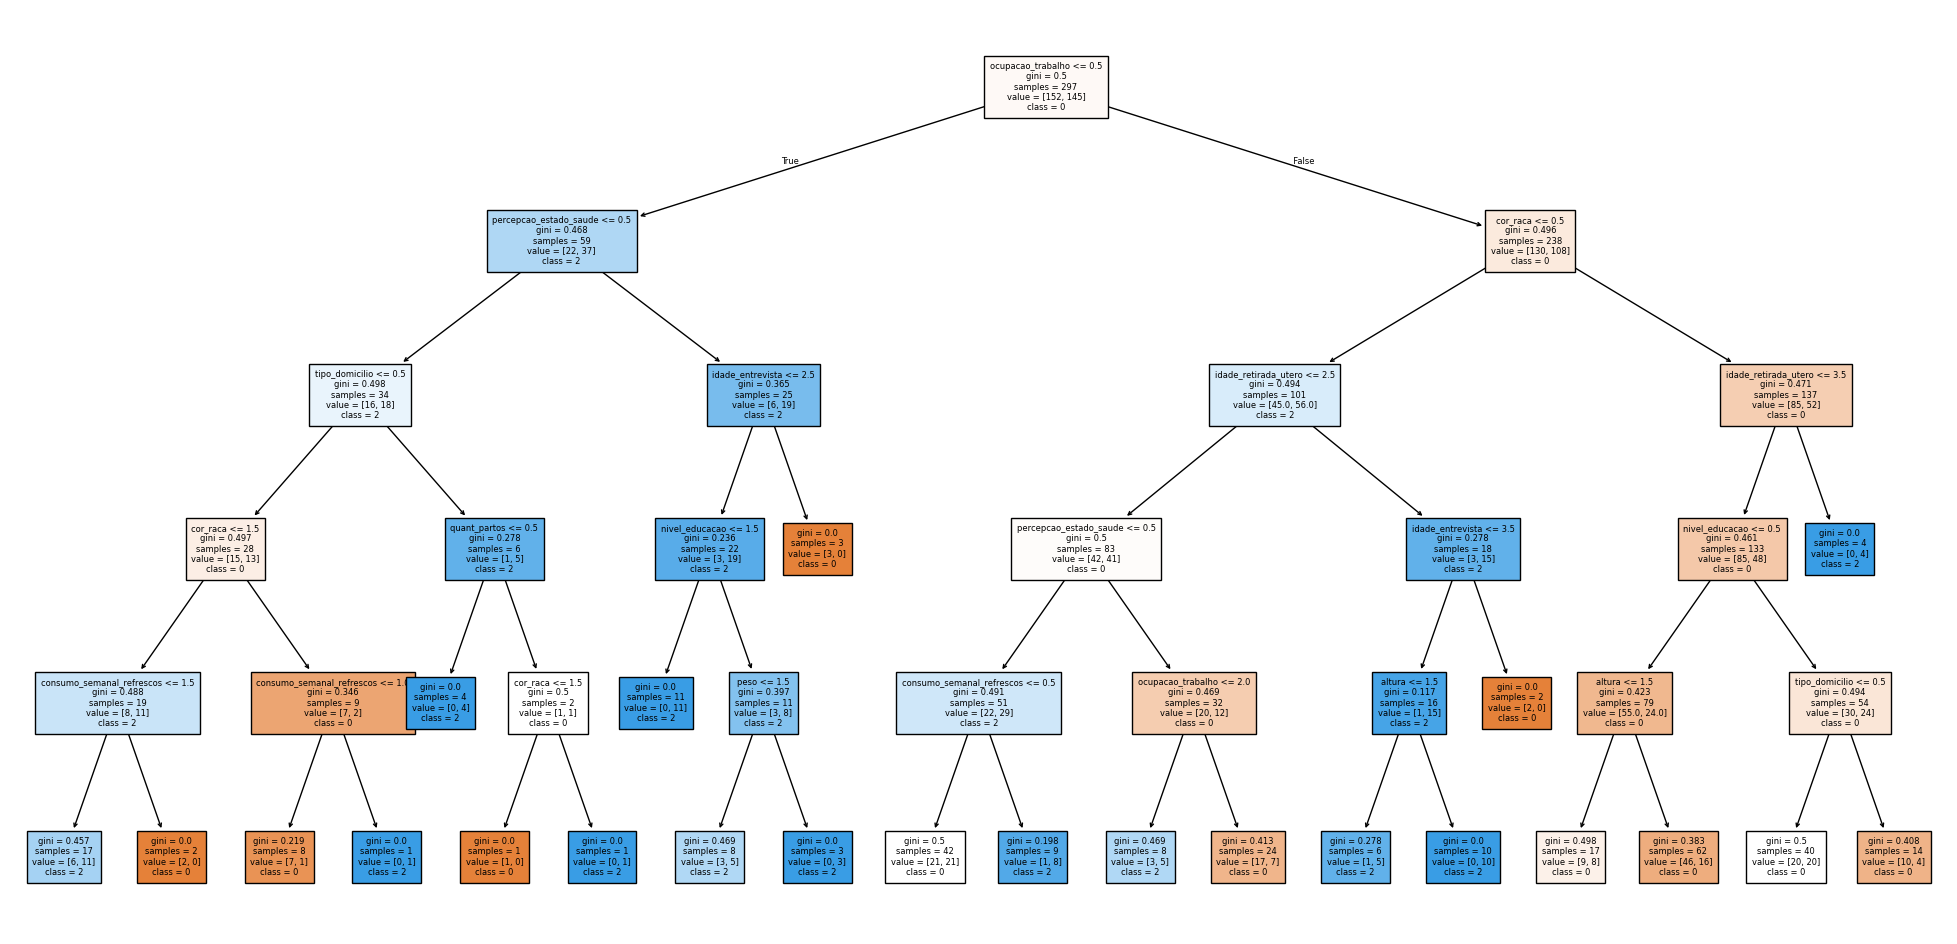

Model Accuracy: 0.5867
F1-score: 0.5777


In [50]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score

# Prepare data
target = 'motivo_retirada_utero'
X = kdd_data_filtered.drop(columns=[target])
y = kdd_data_filtered[target]

# Handle missing values if any (filling with 0 for safety, though info suggests non-null)
X = X.fillna(0)
y = y.fillna(0)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit classifier
clf = DecisionTreeClassifier(max_depth=5, random_state=42, criterion='gini')
clf.fit(X_train, y_train)

# Plot the tree
plt.figure(figsize=(25, 12))
plot_tree(clf, filled=True, feature_names=list(X.columns), class_names=[str(c) for c in clf.classes_], fontsize=6)
plt.show()

# Check accuracy
print(f"Model Accuracy: {clf.score(X_test, y_test):.4f}")

# Predict on the test set
y_pred = clf.predict(X_test)

# Calculate F1-score
f1 = f1_score(y_test, y_pred, average='weighted') # Use 'weighted' for multi-class classification
print(f"F1-score: {f1:.4f}")